In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

In [3]:
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [4]:
def check_prob(X):
    x_range, f =X
    f_min = minimize_scalar(f).fun
    assert f_min >=0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f,-np.inf, np.inf)[0], 6)
    assert prob_sum ==1, f'sum of probability is {prob_sum}'
    print(f'expected value{E(X):.3f}')
    print(f'variance{V(X):.3f}')

def plot_prob(X, x_min, x_max):
    x_range, f =X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]
    
    xs = np.linspace(x_min, x_max, 100)
    
    fig=plt.figure(figsize=(10,6))
    ax=fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs],
            label='f(x)', color = 'gray')
    ax.plot(xs, [F(x) for x in xs],
            label = 'F(x)',ls='--' ,color = 'gray')
    
    ax.legend()
    plt.show()

## 정규분포의 표준화

In [5]:
def N(mu, sigma):
    x_range = [-np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2*np.pi*sigma**2) * np.exp(-(x-mu)**2/(2*sigma**2))
    return x_range, f

In [6]:
mu, sigma = 2, 0.5
X = N(mu, sigma)

In [7]:
check_prob(X)

expected value2.000
variance0.250


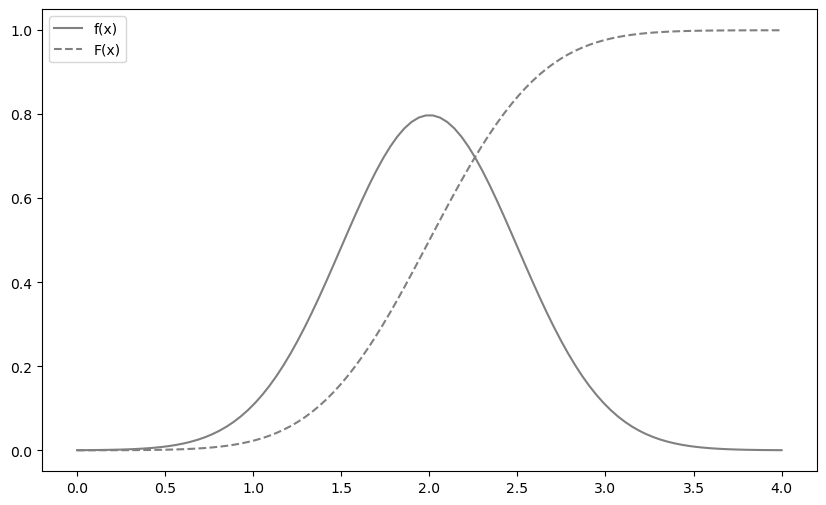

In [8]:
plot_prob(X,0,4)

In [9]:
rv = stats.norm(2, 0.5)

In [11]:
rv.mean(), rv.var()

(2.000, 0.250)

In [12]:
rv.pdf(2)

0.798

cdf 메서드: X가 1.7보다 작은 값이 되는 확률 P(X <= 1.7) 구하기

In [13]:
rv.cdf(1.7)

0.274

In [15]:
# isf(a)매서드: 상위 100a%점을 구하는 법
rv.isf(0.3)     # 상위 30퍼센트 기준이되는 x 구하기

2.262

In [17]:
# interval(alpha) : 확률이 alpha가 되는 가운데 부분의 구한을 구하기
# P(X<=a) = P(X>=b) = (1-alpha)/2
rv.interval(0.9)

(1.178, 2.822)

In [18]:
rv.isf(0.95), rv.isf(0.05)

(1.178, 2.822)

stats.norm 을 사용하여 정규분포 그리기

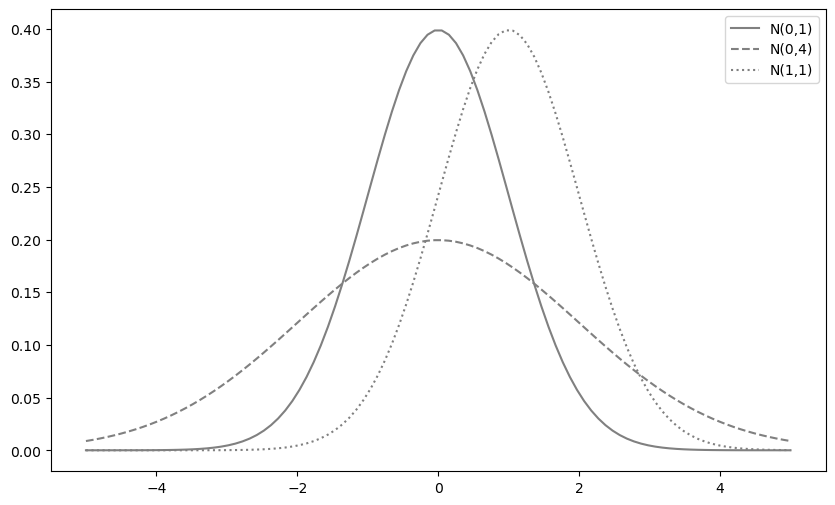

In [19]:
fig=plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs=np.linspace(-5,5,100)
params = [(0,1),(0,2),(1,1)]
for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs), label=f'N({mu},{sigma**2})', ls=ls, color='gray')
ax.legend()

plt.show()

## 지수분포

In [20]:
def Ex(lam):
    x_range = [0, np.inf]
    def f(x):
        if x >= 0:
            return lam * np.exp(-lam *x)
        else:
            return 0
    return x_range, f

In [21]:
lam = 3
X = Ex(lam)

In [23]:
check_prob(X)

expected value0.333
variance0.111


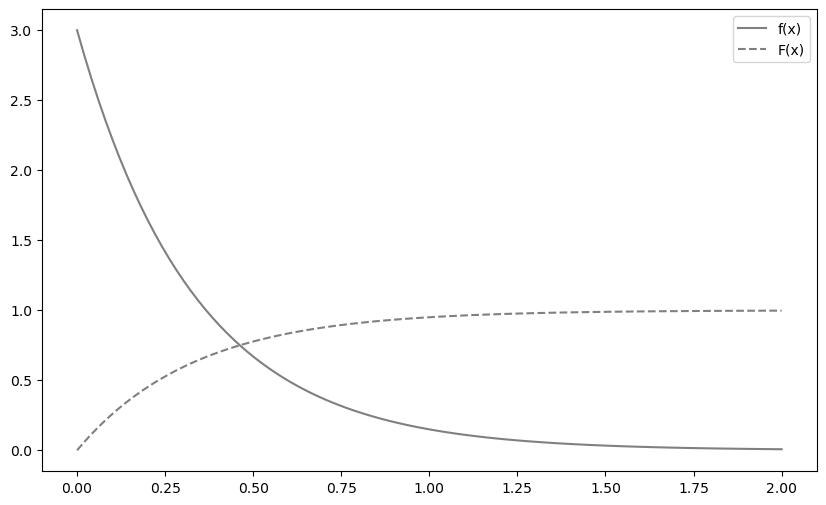

In [24]:
plot_prob(X, 0, 2)

지수분포를 따르는 확률변수를 expon 함수로 작성할 수 있다.

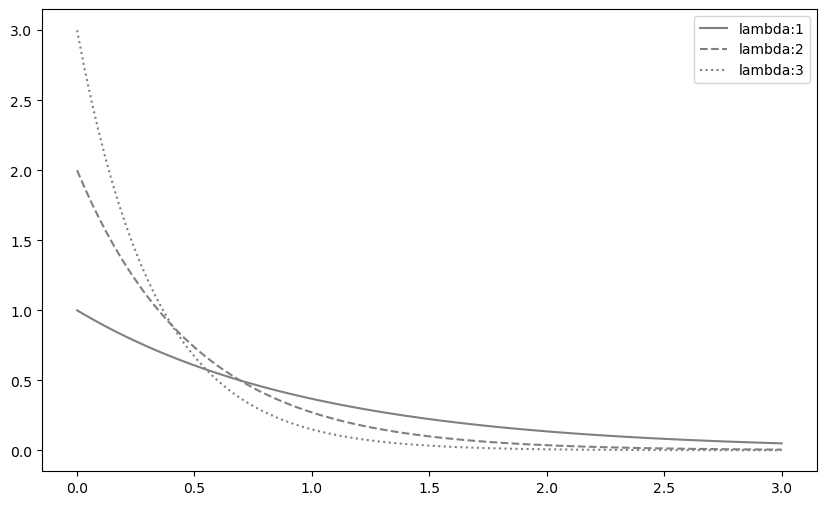

In [22]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 3, 100)
for lam, ls in zip([1,2,3], linestyles):
    rv = stats.expon(scale=1/lam)
    ax.plot(xs, rv.pdf(xs), label=f'lambda:{lam}', ls=ls, color='gray')
ax.legend()

plt.show()

## 카이제곱분포

In [26]:
n = 10
rv = stats.norm()
sample_size = int(1e6)
# 표준정규분포에서 표본크기 100만으로 무작위 추출한다.
Zs_sample = rv.rvs((n, sample_size))
# axis = 0 에서 총합을 구하고, 표준정규분포의 제곱합 표본 데이터를 구한다.
chi2_sample = np.sum(Zs_sample**2, axis=0)

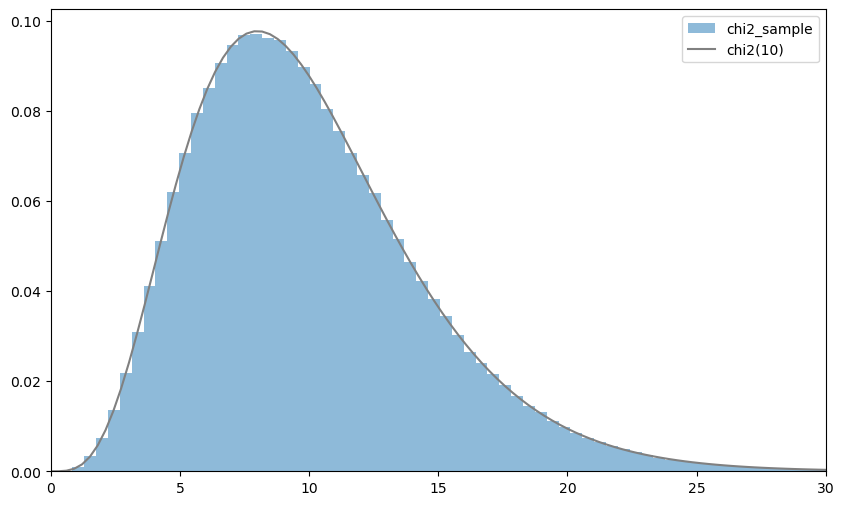

In [27]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv_true = stats.chi2(n)
xs = np.linspace(0, 30, 100)
ax.hist(chi2_sample, bins=100, density=True, alpha=0.5, label='chi2_sample')
ax.plot(xs, rv_true.pdf(xs), label=f'chi2({n})', color='gray')

ax.legend()
ax.set_xlim(0,30)
plt.show()

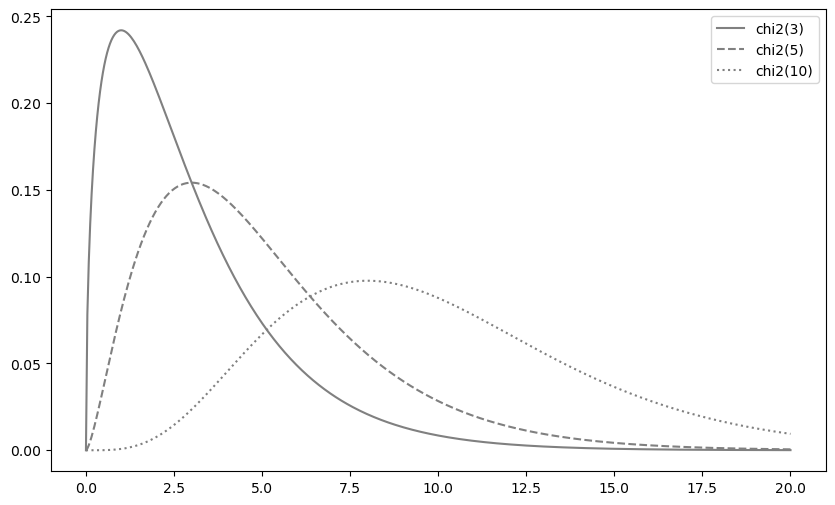

In [29]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 20, 500)
for n, ls in zip([3,5,10], linestyles):
    rv = stats.chi2(n)
    ax.plot(xs, rv.pdf(xs), label=f'chi2({n})', ls=ls, color='gray')

ax.legend()
plt.show()

자유도가 커질수록 좌우대칭에 가까워진다

In [30]:
rv = stats.chi2(5)
rv.isf(0.05)

11.070

## t분포

In [31]:
n=10
rv1=stats.norm()
rv2=stats.chi2(n)

sample_size = int(1e6)
Z_sample = rv1.rvs(sample_size)
chi2_sample = rv2.rvs(sample_size)

t_sample = Z_sample / np.sqrt(chi2_sample/n)

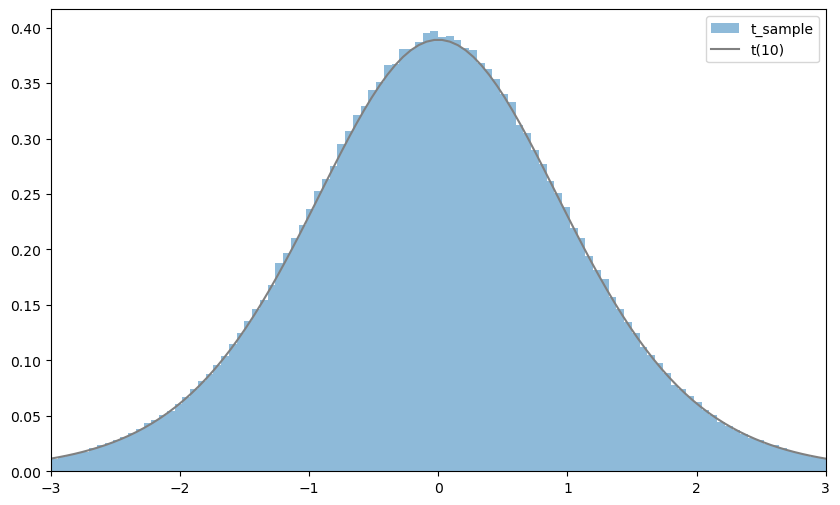

In [32]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.t(n)
xs = np.linspace(-3, 3, 100)
ax.hist(t_sample, bins=100, range=(-3, 3), density=True, alpha=0.5, label='t_sample')
ax.plot(xs, rv.pdf(xs), label=f't({n})', color='gray')

ax.legend()
ax.set_xlim(-3,3)
plt.show()
    

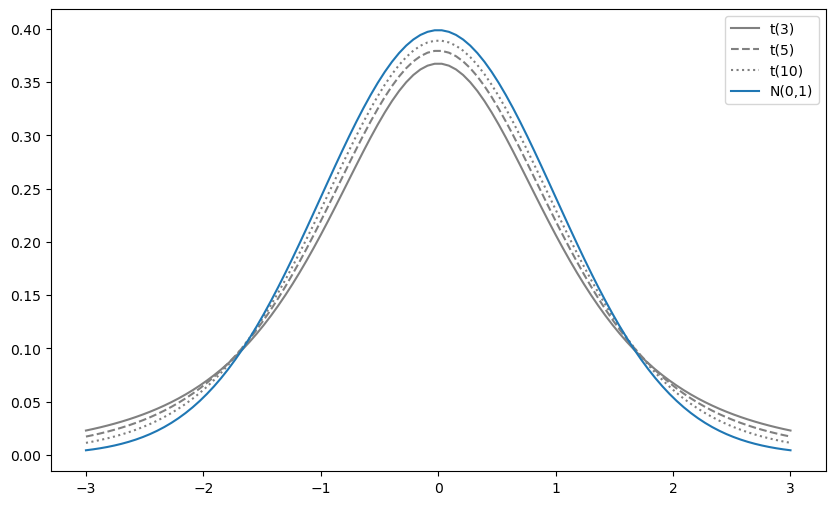

In [34]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.linspace(-3,3,100)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.t(n)
    ax.plot(xs, rv.pdf(xs), label=f't({n})',ls=ls, color='gray')

rv= stats.norm()
ax.plot(xs, rv.pdf(xs), label='N(0,1)')

ax.legend()
plt.show()
# 자유도가 커지면 표준정규분포에 가까워진다

## F분포